# Pre-processing and exploration of the data

# Summary

* [Pre-processing : checking for NaN values](#preprocessing)
    * [Beer datasets](#beer_processing)
    * [User datasets](#user_processing)
    * [Brewery datasets](#brewery_processing)
    
* [Exploration of the datasets](#exploration)
    * Summary statistics ? (discuter quoi mettre ici)
    * [Textual reviews](#textual_reviews)

* [SAT dataset](#sat)

In [1]:
#Uploading of the necessary libraries:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import re

In [3]:
#Uploading of the datasets: 

DATASET_BEERADVOCATE = 'DATA/BeerAdvocate/'
DATASET_RATEBEER = 'DATA/RateBeer/'
DATASET_MATCHEDBEER = 'DATA/matched_beer_data/'

#Beer advocate dataset
df_adv_beer = pd.read_csv(DATASET_BEERADVOCATE + 'beers.csv')
df_adv_breweries = pd.read_csv(DATASET_BEERADVOCATE + 'breweries.csv')
df_adv_users = pd.read_csv(DATASET_BEERADVOCATE + 'users.csv')

#Ratebeer dataset
df_rb_beer = pd.read_csv(DATASET_RATEBEER + 'beers.csv')
df_rb_breweries = pd.read_csv(DATASET_RATEBEER + 'breweries.csv')
df_rb_users = pd.read_csv(DATASET_RATEBEER + 'users.csv')

#Matched beer dataset
df_md_beer = pd.read_csv(DATASET_MATCHEDBEER + 'beers.csv',skiprows=1)
df_md_beer_origin = pd.read_csv(DATASET_MATCHEDBEER + 'beers.csv', nrows=0)
df_md_breweries = pd.read_csv(DATASET_MATCHEDBEER + 'breweries.csv', skiprows=1)
df_md_breweries_origin = pd.read_csv(DATASET_MATCHEDBEER + 'breweries.csv', nrows=0)
df_md_users = pd.read_csv(DATASET_MATCHEDBEER + 'users.csv', skiprows=1)
df_md_users_origin = pd.read_csv(DATASET_MATCHEDBEER + 'users.csv', nrows=0)
df_md_users_approx = pd.read_csv(DATASET_MATCHEDBEER + 'users_approx.csv', skiprows=1)
df_md_users_approx_origin = pd.read_csv(DATASET_MATCHEDBEER + 'users_approx.csv', nrows=0)

##Add suffix of original dataset to columns' name
df_md_beer.columns = df_md_beer_origin.columns + '_' + df_md_beer.columns
df_md_breweries.columns = df_md_breweries_origin.columns + '_' + df_md_breweries.columns
df_md_users.columns = df_md_users_origin.columns + '_' + df_md_users.columns
df_md_users_approx.columns = df_md_users_approx_origin.columns + '_' + df_md_users_approx.columns

##remove '.' and numbers from column's name 
pattern_number = r'[0-9]'
pattern_dot = r'[.]'
df_md_beer = df_md_beer.rename(columns={c: re.sub(pattern_number,'',c) for c in df_md_beer.columns})
df_md_beer = df_md_beer.rename(columns={c: re.sub(pattern_dot,'',c) for c in df_md_beer.columns})
df_md_breweries = df_md_breweries.rename(columns={c: re.sub(pattern_number,'',c) for c in df_md_breweries.columns})
df_md_breweries = df_md_breweries.rename(columns={c: re.sub(pattern_dot,'',c) for c in df_md_breweries.columns})
df_md_users = df_md_users.rename(columns={c: re.sub(pattern_number,'',c) for c in df_md_users.columns})
df_md_users = df_md_users.rename(columns={c: re.sub(pattern_dot,'',c) for c in df_md_users.columns})
df_md_users_approx = df_md_users_approx.rename(columns={c: re.sub(pattern_number,'',c) for c in df_md_users_approx.columns})
df_md_users_approx = df_md_users_approx.rename(columns={c: re.sub(pattern_dot,'',c) for c in df_md_users_approx.columns})


<a id='preprocessing'></a>

## Pre-processing: checking for NaN values


<a id='beer_processing'></a>

### Beer datasets

In [4]:
#Let's have a look 
df_adv_beer.head()

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,nbr_reviews,avg,ba_score,bros_score,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
0,166064,Nashe Moskovskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.7,NaN,NaN,0,NaN
1,166065,Nashe Pivovskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,3.8,NaN,NaN,0,NaN
2,166066,Nashe Shakhterskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.8,NaN,NaN,0,NaN
3,166067,Nashe Zhigulevskoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.0,NaN,NaN,0,NaN
4,166063,Zhivoe,39912,Abdysh-Ata (Абдыш Ата),Euro Pale Lager,0,0,NaN,NaN,NaN,4.5,NaN,NaN,0,NaN


In [5]:
df_rb_beer.head()

,ba_abv,ba_avg,ba_avg_computed,ba_avg_matched_valid_ratings,ba_ba_score,ba_beer_id,ba_beer_name,ba_beer_wout_brewery_name,ba_brewery_id,ba_brewery_name,...,rb_brewery_id,rb_brewery_name,rb_nbr_matched_valid_ratings,rb_nbr_ratings,rb_overall_score,rb_style,rb_style_score,rb_zscore,scores_diff,scores_sim
0,4.8,3.45,3.439867,3.504068,80.0,19827,Legbiter,Legbiter,10093,Strangford Lough Brewing Company Ltd,...,4959,Strangford Lough,89,89,23.0,Golden Ale/Blond Ale,27.0,-0.698304,1.000000,1.0
1,6.0,3.86,3.888750,3.768333,NaN,20841,St. Patrick's Ale,Patricks Ale St,10093,Strangford Lough Brewing Company Ltd,...,4959,Strangford Lough,11,11,52.0,Irish Ale,79.0,0.005754,0.527141,1.0
2,4.2,3.56,3.556094,3.580417,82.0,20842,St. Patrick's Best,Patricks Best St,10093,Strangford Lough Brewing Company Ltd,...,4959,Strangford Lough,74,74,26.0,Bitter,25.0,-0.862119,0.527141,1.0
3,4.8,3.96,3.960000,3.960000,NaN,22659,St. Patrick's Gold,Patricks Gold St,10093,Strangford Lough Brewing Company Ltd,...,4959,Strangford Lough,4,4,NaN,Amber Ale,NaN,-0.758491,0.527141,1.0
4,4.5,NaN,NaN,NaN,NaN,178681,Sheelin Stout,Stout,32848,The Sheelin Brewery,...,17616,Sheelin,2,2,NaN,Mild Ale,NaN,-0.347271,1.000000,1.0


In [6]:
df_md_beer.head()

,beer_id,beer_name,brewery_id,brewery_name,style,nbr_ratings,overall_score,style_score,avg,abv,avg_computed,zscore,nbr_matched_valid_ratings,avg_matched_valid_ratings
0,410549,33 Export (Gabon),3198,Sobraga,Pale Lager,1,NaN,NaN,2.72,5.0,2.000000,NaN,0,NaN
1,105273,Castel Beer (Gabon),3198,Sobraga,Pale Lager,10,5.0,58.0,2.18,5.2,1.910000,NaN,0,NaN
2,19445,Régab,3198,Sobraga,Pale Lager,27,1.0,22.0,1.83,4.5,1.811111,NaN,0,NaN
3,155699,Ards Bally Black Stout,13538,Ards Brewing Co.,Stout,6,NaN,NaN,3.18,4.6,3.866667,0.823699,6,3.866667
4,239097,Ards Belfast 366,13538,Ards Brewing Co.,Golden Ale/Blond Ale,1,NaN,NaN,2.79,4.2,3.000000,NaN,0,NaN


In [7]:
#Let's check the shape of the datasets: 

print("Beer advocate beer dataset has {} rows and {} colomns".format(df_adv_beer.shape[0],df_adv_beer.shape[1]))
print("RateBeer beer dataset has {} rows and {} colomns".format(df_rb_beer.shape[0],df_rb_beer.shape[1]))
print("Matched beer beer dataset has {} rows and {} colomns".format(df_md_beer.shape[0],df_md_beer.shape[1]))

Beer advocate beer dataset has 280823 rows and 15 colomns
Matched beer beer dataset has 45640 rows and 33 colomns
RateBeer beer dataset has 442081 rows and 14 colomns


In [8]:
#We are looking at the proportion of NaNs in each column of the beer datasets.
##Creation of 3 dataframes, one for each dataset having 3 columns
list = ['Total','NaN_proportion','NaN_number']
dfnan_adv = pd.DataFrame(columns = list)
dfnan_rate = pd.DataFrame(columns = list)
dfnan_md = pd.DataFrame(columns = list)

dfnan_adv['NaN_proportion'] = (df_adv_beer.isna().sum()/df_adv_beer.shape[0]) #proportion of NaN values in each column 
dfnan_adv['NaN_number'] = (df_adv_beer.isna().sum()) #total number of NaN values in each column 
dfnan_adv.loc[:,'Total'] = df_adv_beer.shape[0] #Number of rows in the dataset

dfnan_rate['NaN_proportion'] = (df_rb_beer.isna().sum()/df_rb_beer.shape[0])
dfnan_rate['NaN_number'] = (df_rb_beer.isna().sum())
dfnan_rate.loc[:,'Total'] = df_rb_beer.shape[0]

dfnan_md['NaN_proportion'] = (df_md_beer.isna().sum()/df_md_beer.shape[0])
dfnan_md['NaN_number'] = (df_md_beer.isna().sum())
dfnan_md.loc[:,'Total'] = df_md_beer.shape[0]

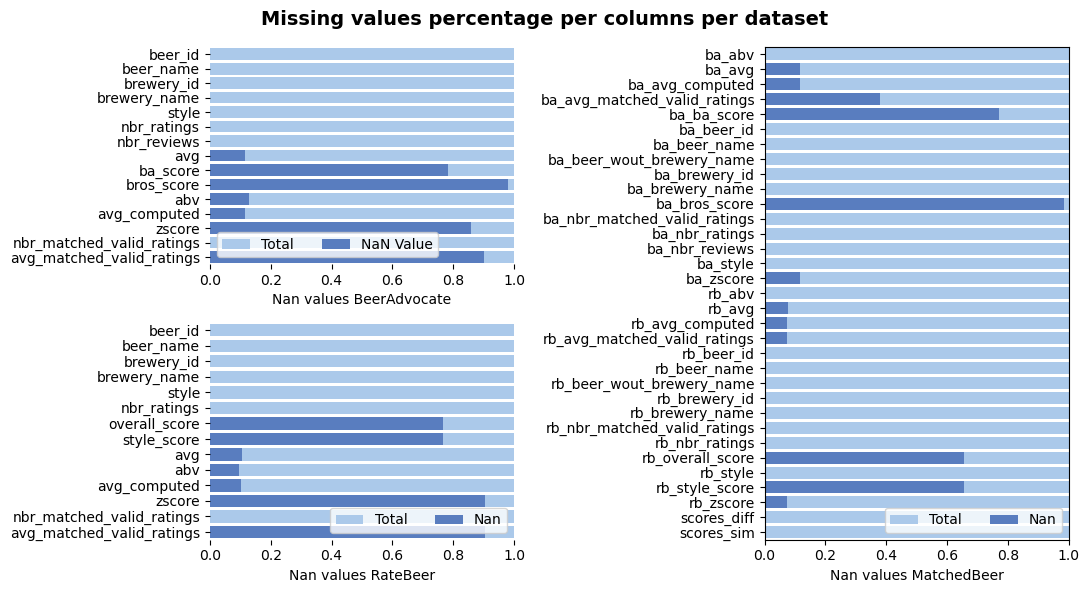

In [9]:
#We will look at the distribution of NaNs in each dataset.
plt.close('all')
fig = plt.figure(figsize=(11,6))

ax1 = plt.subplot(221)
ax2 = plt.subplot(223)
ax3 = plt.subplot(122)


sns.set_color_codes("pastel")
sns.barplot(x="Total", y = dfnan_adv.index, data=dfnan_adv, label="Valid values", color="b", ax=ax1)
s
sns.set_color_codes("muted")
sns.barplot(x='NaN_percentage', y = dfnan_adv.index, data=dfnan_adv, label="NaN Values", color="b", ax=ax1)

ax1.legend(ncol=2, loc="lower left", frameon=True)
ax1.set(xlim=(0, 1), ylabel="", xlabel="NaN values BeerAdvocate")
sns.despine(left=True, bottom=True,ax=ax1)


sns.set_color_codes("pastel")
sns.barplot(x="Total", y = dfnan_rate.index, data=dfnan_rate, label="Valid Values", color="b",ax=ax2)

sns.set_color_codes("muted")
sns.barplot(x='NaN_percentage',  y = dfnan_rate.index, data=dfnan_rate, label="NaN", color="b", ax=ax2)

ax2.legend(ncol=2, loc="lower right", frameon=True)
ax2.set(xlim=(0, 1), ylabel="", xlabel="NaN values RateBeer") 

sns.despine(left=True, bottom=True, ax=ax2)


sns.set_color_codes("pastel")
sns.barplot(x="Total", y = dfnan_md.index, data=dfnan_md, label="Valid Values", color="b",ax=ax3)

sns.set_color_codes("muted")
sns.barplot(x='NaN_percentage',  y = dfnan_md.index, data=dfnan_md, label="NaN", color="b", ax=ax3)

ax3.legend(ncol=2, loc="lower right", frameon=True)
ax3.set(xlim=(0, 1), ylabel="", xlabel="NaN values MatchedBeer") 

sns.despine(left=True, bottom=True, ax=ax2)

plt.suptitle('Missing values proportion per columns per dataset', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

We notice that a number of columns have a very high percentage of NA values. Analysis on these columns would be limited to a very narrow portion of the dataset, so we decide to drop these columns instead. We decide to drop columns that have more than 60% of NA values. 

In [10]:
df_adv_beer = df_adv_beer[df_adv_beer.columns[df_adv_beer.isna().sum()/df_adv_beer.shape[0] < 0.60]]
df_rb_beer=df_rb_beer[df_rb_beer.columns[df_rb_beer.isna().sum()/df_rb_beer.shape[0] < 0.60]]
df_md_beer=df_md_beer[df_md_beer.columns[df_md_beer.isna().sum()/df_md_beer.shape[0] < 0.60]]

In [11]:
#We check that all beers are unique in both datasets
print(df_adv_beer["beer_id"].nunique()==df_adv_beer.shape[0])
print(df_rb_beer["beer_id"].nunique()==df_rb_beer.shape[0])
print(df_md_beer["ba_beer_id"].nunique()==df_md_beer.shape[0])
print(df_md_beer["rb_beer_id"].nunique()==df_md_beer.shape[0])

True
True


In [12]:
#Some beers don't have ratings. We are not interested in them, so we drop them
df_adv_beer_wrating=df_adv_beer.drop(df_adv_beer[df_adv_beer['nbr_ratings']==0].index)
print("{} beers of the Beer Advocate dataset have been dropped".format((df_adv_beer.shape[0]-df_adv_beer_wrating.shape[0])))
df_rb_beer_wrating=df_rb_beer.drop(df_rb_beer[df_rb_beer['nbr_ratings']==0].index)
print("{} beers of the RateBeer dataset have been dropped".format((df_rb_beer.shape[0]-df_rb_beer_wrating.shape[0])))
df_md_beer_wrating=df_md_beer.drop(df_md_beer[df_md_beer['rb_nbr_ratings']==0].index)
df_md_beer_wrating=df_md_beer_wrating.drop(df_md_beer_wrating[df_md_beer_wrating['ba_nbr_ratings']==0].index)
print("{} beers of the matched dataset have been dropped".format((df_md_beer.shape[0]-df_md_beer_wrating.shape[0])))

32841 beers of the Beer Advocate dataset have been dropped
7563 beers of the matched dataset have been dropped
45391 beers of the RateBeer dataset have been dropped


<a id='user_processing'></a>

### Users datasets 

In [13]:
#Let's have a look 
df_adv_users.head()

,nbr_ratings,nbr_reviews,user_id,user_name,joined,location
0,7820,465,nmann08.184925,nmann08,1.199704e+09,"United States, Washington"
1,2521,2504,stjamesgate.163714,StJamesGate,1.191838e+09,"United States, New York"
2,1797,1143,mdagnew.19527,mdagnew,1.116410e+09,Northern Ireland
3,31,31,helloloser12345.10867,helloloser12345,1.101380e+09,Northern Ireland
4,604,604,cypressbob.3708,cypressbob,1.069326e+09,Northern Ireland


In [14]:
df_rb_users.head()

,ba_joined,ba_location,ba_nbr_ratings,ba_nbr_reviews,ba_user_id,ba_user_name,ba_user_name_lower,rb_joined,rb_location,rb_nbr_ratings,rb_user_id,rb_user_name,rb_user_name_lower
0,1.220868e+09,Germany,6,6,erzengel.248045,Erzengel,erzengel,1.224324e+09,Germany,8781,83106,Erzengel,erzengel
1,1.348394e+09,"United States, Virginia",1,1,gendv138.695700,GenDV138,gendv138,1.385723e+09,"United States, Virginia",6240,290599,GenDV138,gendv138
2,1.207303e+09,"United States, Washington",3,3,nimbleprop.208928,nimbleprop,nimbleprop,1.150798e+09,"United States, Washington",7452,38859,nimbleprop,nimbleprop
3,1.322737e+09,Estonia,11,0,visionthing.639993,visionthing,visionthing,1.242986e+09,Estonia,5462,91324,visionthing,visionthing
4,1.432116e+09,England,1,0,lazypyro.989356,LazyPyro,lazypyro,1.431166e+09,England,1096,368991,LazyPyro,lazypyro


In [15]:
df_md_users.head()

,nbr_ratings,nbr_reviews,user_id,user_name,joined,location
0,7820,465,nmann08.184925,nmann08,1.199704e+09,"United States, Washington"
1,2521,2504,stjamesgate.163714,StJamesGate,1.191838e+09,"United States, New York"
2,1797,1143,mdagnew.19527,mdagnew,1.116410e+09,Northern Ireland
3,31,31,helloloser12345.10867,helloloser12345,1.101380e+09,Northern Ireland
4,604,604,cypressbob.3708,cypressbob,1.069326e+09,Northern Ireland


In [16]:
#Let's check the shape of the datasets
print("Beer advocate users dataset has {} rows and {} colomns".format(df_adv_users.shape[0],df_adv_users.shape[1]))
print("RateBeer users dataset has {} rows and {} colomns".format(df_rb_users.shape[0],df_rb_users.shape[1]))
print("Matched beer users dataset has {} rows and {} colomns".format(df_md_users.shape[0],df_md_users.shape[1]))

Beer advocate users dataset has 153704 rows and 6 colomns
Matched beer users dataset has 3020 rows and 13 colomns
RateBeer users dataset has 70174 rows and 5 colomns


In [17]:
#Drop users that are in duplicates in the dataset

df_adv_unique_users=df_adv_users.drop_duplicates(subset="user_id",keep="first") #suppresses all copies of same user_id and keeps the first instance
#sanity check 
print(df_adv_unique_users.shape[0]==df_adv_unique_users["user_id"].nunique())

df_rb_unique_users=df_rb_users.drop_duplicates(subset="user_id",keep="first") 
#sanity check 
print(df_rb_unique_users.shape[0]==df_rb_unique_users["user_id"].nunique())

df_md_unique_ba_users=df_md_users.drop_duplicates(subset="ba_user_id",keep="first")
df_md_unique_rb_users=df_md_users.drop_duplicates(subset="rb_user_id",keep="first")
#sanity check 
print(df_md_unique_ba_users.shape[0]==df_md_unique_ba_users["ba_user_id"].nunique())
print(df_md_unique_rb_users.shape[0]==df_md_unique_rb_users["rb_user_id"].nunique())

True
True
True
True


<a id='brewery_processing'></a>

### Breweries dataset

In [18]:
#Let's check the shape of the breweries dataset
print("Beer advocate breweries dataset has {} rows and {} colomns".format(df_adv_breweries.shape[0],df_adv_breweries.shape[1]))
print("RateBeer breweries dataset has {} rows and {} colomns".format(df_rb_breweries.shape[0],df_rb_breweries.shape[1]))
print("Matched beer breweries dataset has {} rows and {} colomns".format(df_md_breweries.shape[0],df_md_breweries.shape[1]))

Beer advocate breweries dataset has 16758 rows and 4 colomns
Matched beer breweries dataset has 8281 rows and 10 colomns
RateBeer breweries dataset has 24189 rows and 4 colomns


In [19]:
#Let's have a look
df_adv_breweries.head()

,id,location,name,nbr_beers
0,39912,Kyrgyzstan,Abdysh-Ata (Абдыш Ата),5
1,39913,Kyrgyzstan,Arpa (АРПА),1
2,39914,Kyrgyzstan,Bear Beer,4
3,39915,Kyrgyzstan,Blonder Pub,4
4,39916,Kyrgyzstan,Kellers Bier,2


In [20]:
df_rb_breweries.head()

,ba_id,ba_location,ba_name,ba_nbr_beers,rb_id,rb_location,rb_name,rb_nbr_beers,scores_diff,scores_sim
0,10093,Northern Ireland,Strangford Lough Brewing Company Ltd,5,4959,Northern Ireland,Strangford Lough,5,0.431275,0.889062
1,32848,Northern Ireland,The Sheelin Brewery,4,17616,Northern Ireland,Sheelin,2,0.526388,0.863596
2,40360,Northern Ireland,Walled City Brewing Company,6,24866,Northern Ireland,Walled City,3,0.527852,0.954183
3,40309,Northern Ireland,Ards Brewing Company,7,13538,Northern Ireland,Ards Brewing Co.,13,0.554395,0.896098
4,41205,Northern Ireland,Barrahooley Brewery,3,22304,Northern Ireland,Barrahooley Craft Brewery,4,0.602544,0.896205


In [21]:
df_md_breweries.head()

,id,location,name,nbr_beers
0,3198,Gabon,Sobraga,3
1,13538,Northern Ireland,Ards Brewing Co.,13
2,22304,Northern Ireland,Barrahooley Craft Brewery,4
3,22818,Northern Ireland,Boundary,66
4,24297,Northern Ireland,Brewbot Belfast,3


In [22]:
#We don't care about breweries that don't have any beers, so we drop them 

df_adv_breweries_wbeer=df_adv_breweries.drop(df_adv_breweries[df_adv_breweries['nbr_beers']==0].index)
print("{} breweries have been dropped from the Beer Advocate dataset".format((df_adv_breweries.shape[0]-df_adv_breweries_wbeer.shape[0])))

df_rb_breweries_wbeer=df_rb_breweries.drop(df_rb_breweries[df_rb_breweries['nbr_beers']==0].index)
df_rb_breweries_wbeer['nbr_beers'].sort_values(ascending=True)
print("{} breweries have been dropped from the RateBeer dataset".format((df_rb_breweries.shape[0]-df_rb_breweries_wbeer.shape[0])))

df_md_breweries_wbeer=df_md_breweries.drop(df_md_breweries[df_md_breweries['rb_nbr_beers']==0].index)
df_md_breweries_wbeer=df_md_breweries_wbeer.drop(df_md_breweries_wbeer[df_md_breweries_wbeer['ba_nbr_beers']==0].index)

print("{} breweries have been dropped from the Matched Beer dataset".format((df_md_breweries.shape[0]-df_md_breweries_wbeer.shape[0])))


2236 breweries have been dropped from the Beer Advocate dataset
681 breweries have been dropped from the Matched Beer dataset
71 breweries have been dropped from the RateBeer dataset


<a id='exploration'></a>

## Exploration of the datasets 


### Beers dataset

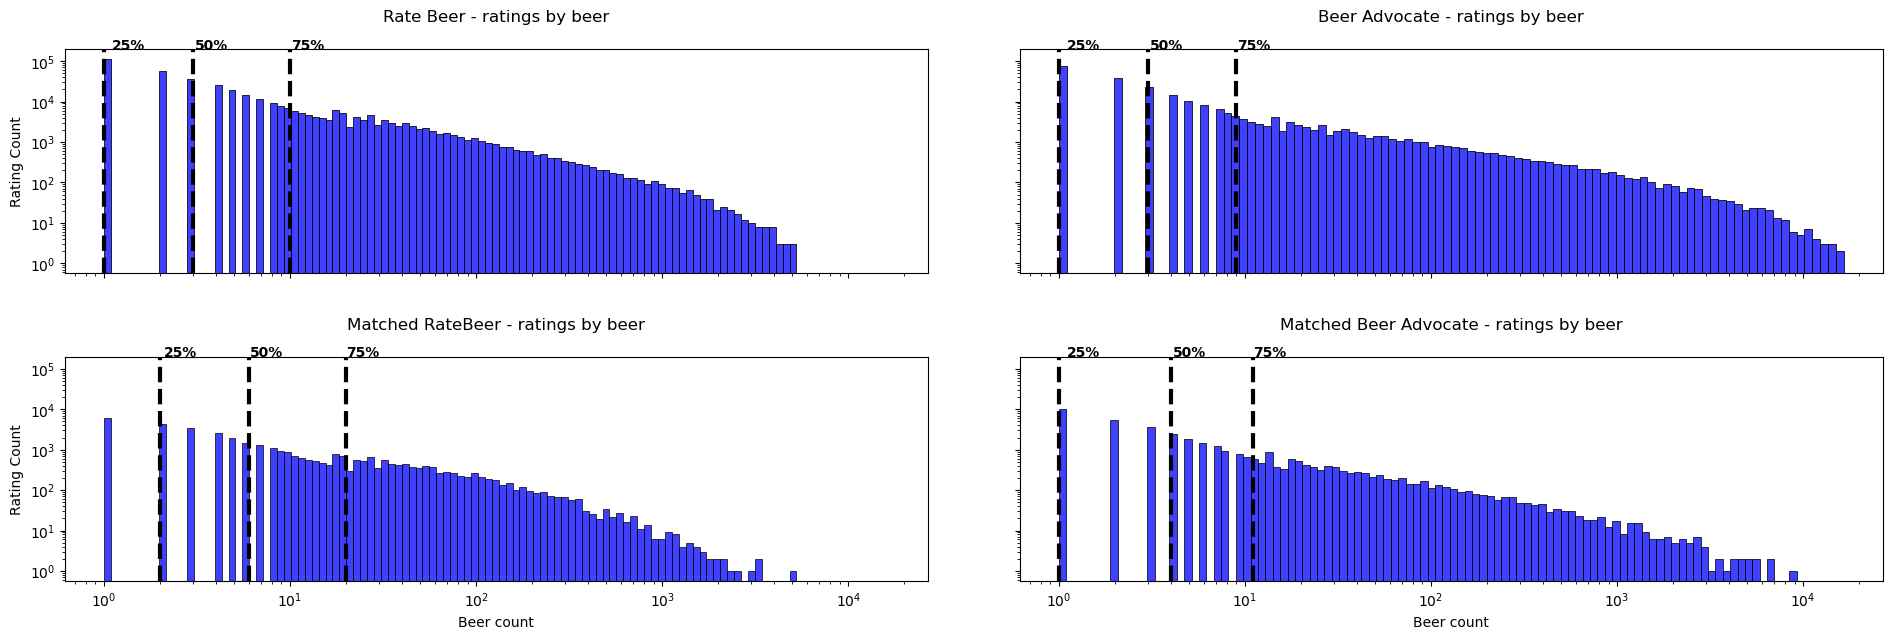

In [23]:
#Histograms
#Beers binned by ratings count:
quantiles = [0.25, 0.5, 0.75]

titles = ['Beer Advocate - ratings by beer','Rate Beer - ratings by beer', 'Matched RateBeer - ratings by beer','Matched Beer Advocate - ratings by beer']
plot_data = [df_adv_beer_wrating.nbr_ratings, df_rb_beer_wrating.nbr_ratings,  df_md_beer_wrating.rb_nbr_ratings, df_md_beer_wrating.ba_nbr_ratings]


fig, axes = plt.subplots(2, 2, figsize=(20, 7),sharey=True,sharex=True)
fig.tight_layout(pad=5)
for i,datum in enumerate(plot_data):
    sns.histplot(ax=axes.flat[i],data=datum,bins=100,log_scale=(True,True), kde=False, color="blue")
    axes.flat[i].set_xlabel("Beer count")
    axes.flat[i].set_ylabel("Rating Count")
    axes.flat[i].set_title(titles[i], pad=20)
    for q in quantiles:
        axes.flat[i].axvline(plot_data[i].quantile(q), 0, 1, color="black", ls='--',linewidth=3)
        axes.flat[i].text(plot_data[i].quantile(q)+0.1, 2e5, str(int(q*100))+'%', horizontalalignment='left', size='medium', color='black', weight='semibold')

We observe a skewed distribution of beers according to the rating count.

In [24]:
#Some stats
print(df_adv_beer_wrating.shape)
df_adv_beer_wrating[["nbr_ratings","avg","abv","avg_computed"]].describe()

(247982, 11)


,nbr_ratings,avg,abv,avg_computed
count,247982.000000,247982.000000,217107.000000,247982.000000
mean,33.845327,3.721189,6.541211,3.717594
std,245.558727,0.475414,2.076558,0.464248
min,1.000000,0.000000,0.010000,1.000000
25%,1.000000,3.500000,5.000000,3.500000
50%,3.000000,3.780000,6.000000,3.770000
75%,9.000000,4.010000,7.500000,4.000000
max,16509.000000,5.000000,67.500000,5.000000


In [25]:
print(df_rb_beer_wrating.shape)
df_rb_beer_wrating[["nbr_ratings","avg","abv","avg_computed"]].describe()

(38077, 29)


,ba_nbr_ratings,rb_nbr_ratings,ba_avg,rb_avg,ba_abv,rb_abv,ba_avg_computed,rb_avg_computed
count,38077.000000,38077.000000,38077.000000,38022.000000,38077.000000,38077.000000,38077.000000,38077.000000
mean,24.973238,26.060036,3.728644,3.154684,6.366607,6.366607,3.724193,3.382589
std,150.504514,87.137093,0.439621,0.287264,1.890536,1.890536,0.424084,0.410644
min,1.000000,1.000000,1.000000,0.000000,0.380000,0.380000,1.000000,0.600000
25%,1.000000,2.000000,3.520000,2.990000,5.000000,5.000000,3.520000,3.169231
50%,4.000000,6.000000,3.780000,3.140000,6.000000,6.000000,3.770000,3.425000
75%,11.000000,20.000000,4.000000,3.330000,7.200000,7.200000,4.000000,3.650000
max,9228.000000,5272.000000,5.000000,4.420000,67.500000,67.500000,5.000000,5.000000


In [26]:
print(df_md_beer_wrating.shape)
df_md_beer_wrating[["ba_nbr_ratings","rb_nbr_ratings","ba_avg","rb_avg","ba_abv","rb_abv","ba_avg_computed","rb_avg_computed"]].describe()

(396690, 10)


,nbr_ratings,avg,abv,avg_computed
count,396690.000000,395647.000000,359958.000000,396690.000000
mean,17.953752,3.026657,6.059846,3.244649
std,85.303131,0.304127,1.928548,0.507520
min,1.000000,0.000000,0.010000,0.500000
25%,1.000000,2.870000,4.800000,3.000000
50%,3.000000,3.020000,5.500000,3.300000
75%,10.000000,3.180000,7.000000,3.594088
max,5272.000000,4.520000,73.000000,5.000000


### Users

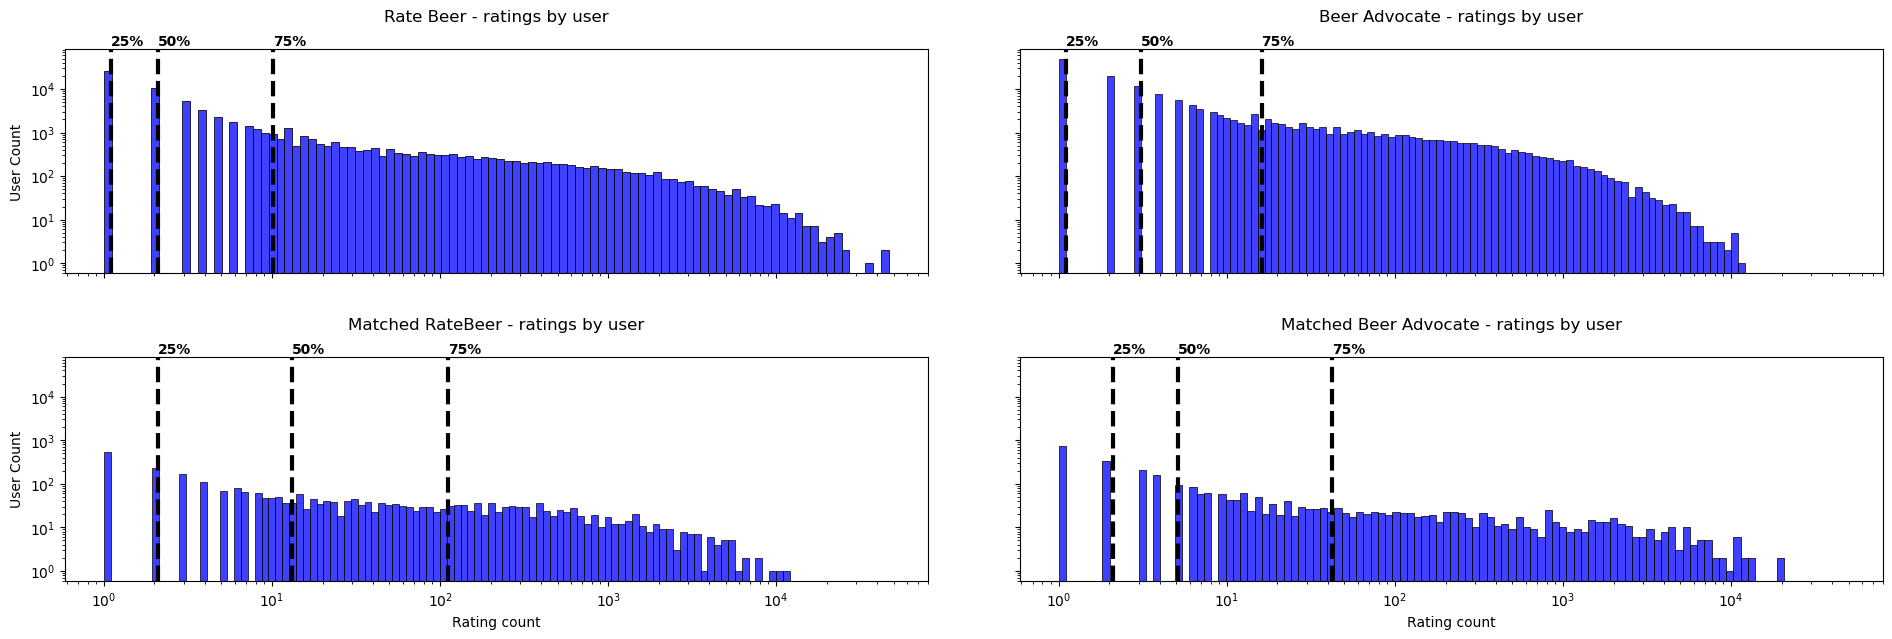

In [27]:
#Users binned by rating count

titles = ['Beer Advocate - ratings by user','Rate Beer - ratings by user', 'Matched RateBeer - ratings by user','Matched Beer Advocate - ratings by user']
plot_data = [df_rb_unique_users.nbr_ratings, df_adv_unique_users.nbr_ratings, df_md_unique_ba_users.ba_nbr_ratings,df_md_unique_rb_users.rb_nbr_ratings]


fig, axes = plt.subplots(2, 2, figsize=(20, 7),sharey=True,sharex=True)
fig.tight_layout(pad=5)
for i,datum in enumerate(plot_data):
    sns.histplot(ax=axes.flat[i],data=datum,bins=100,log_scale=(True,True), kde=False,color="blue")
    axes.flat[i].set_xlabel("Rating count")
    axes.flat[i].set_ylabel("User Count")
    axes.flat[i].set_title(titles[i], pad=20)
    for q in quantiles:
        #Offset of 0.1 so it is more lisible
        axes.flat[i].axvline(plot_data[i].quantile(q)+0.1, 0, 1, color="black", ls='--',linewidth=3)
        axes.flat[i].text(plot_data[i].quantile(q)+0.1, 1e5, str(int(q*100))+'%', horizontalalignment='left', size='medium', color='black', weight='semibold')
      

In [ ]:
We observe a skewed distribution of the number of ratings according to the number of raters. 

In [28]:
#Some stats
print(df_adv_unique_users.shape)
df_adv_unique_users[["nbr_ratings"]].describe()

(153704, 6)


,nbr_ratings
count,153704.000000
mean,54.605163
std,252.388790
min,1.000000
25%,1.000000
50%,3.000000
75%,16.000000
max,12046.000000


In [29]:
print(df_rb_unique_users.shape)
df_rb_unique_users[["nbr_ratings"]].describe()

(70120, 5)


,nbr_ratings
count,70120.000000
mean,108.903936
std,754.777751
min,1.000000
25%,1.000000
50%,2.000000
75%,10.000000
max,46749.000000


In [30]:
print(df_md_unique_ba_users.shape)
df_md_unique_ba_users[["ba_nbr_ratings"]].describe()

(3020, 13)


,ba_nbr_ratings
count,3020.000000
mean,219.901656
std,712.112891
min,1.000000
25%,2.000000
50%,13.000000
75%,112.000000
max,12046.000000


In [31]:
print(df_md_unique_rb_users.shape)
df_md_unique_rb_users[["rb_nbr_ratings"]].describe()

(3020, 13)


,rb_nbr_ratings
count,3020.000000
mean,285.697682
std,1186.459670
min,1.000000
25%,2.000000
50%,5.000000
75%,42.000000
max,20678.000000


In [32]:
#Number of different locations the users come from: 
print("The users of Beer Advocate come from {} different locations".format(df_adv_unique_users["location"].nunique()))
print("The users of RateBeer come from {} different locations".format(df_rb_unique_users["location"].nunique()))
print("The Beer Advocate users of the Matched Beer dataset come from {} different locations".format(df_md_unique_ba_users["ba_location"].nunique()))
print("The RateBeer users of the Matched Beer dataset come from {} different locations".format(df_md_unique_rb_users["rb_location"].nunique()))

The users of Beer Advocate come from 194 different locations
The users of RateBeer come from 222 different locations
The Beer Advocate users of the Matched Beer dataset come from 110 different locations
The RateBeer users of the Matched Beer dataset come from 110 different locations


In [33]:
#Top 5 locations of the users for each dataset:
users_top5_locations=pd.DataFrame(columns=['Beer Advocate users','Rate Beer users','Matched Beer Advocate users','Matched Rate Beer users'])
users_top5_locations['Beer Advocate users']=df_adv_unique_users["location"].value_counts().index.tolist()[:5] #we sort the number of occurences of each location and extract the corresponding top 5 locations
users_top5_locations['Rate Beer users']=df_rb_unique_users["location"].value_counts().index.tolist()[:5]
users_top5_locations['Matched Beer Advocate users']=df_md_unique_ba_users["ba_location"].value_counts().index.tolist()[:5]
users_top5_locations['Matched Rate Beer users']=df_md_unique_rb_users["rb_location"].value_counts().index.tolist()[:5]


users_top5_locations

,Beer Advocate users,Rate Beer users,Matched Beer Advocate users,Matched Rate Beer users
0,"United States, California",Canada,"United States, California","United States, California"
1,"United States, Pennsylvania","United States, California",Canada,Canada
2,"United States, New York",England,"United States, Pennsylvania","United States, Pennsylvania"
3,"United States, Illinois",Poland,"United States, Illinois","United States, Illinois"
4,"United States, Massachusetts","United States, Pennsylvania","United States, New York","United States, New York"


### Breweries

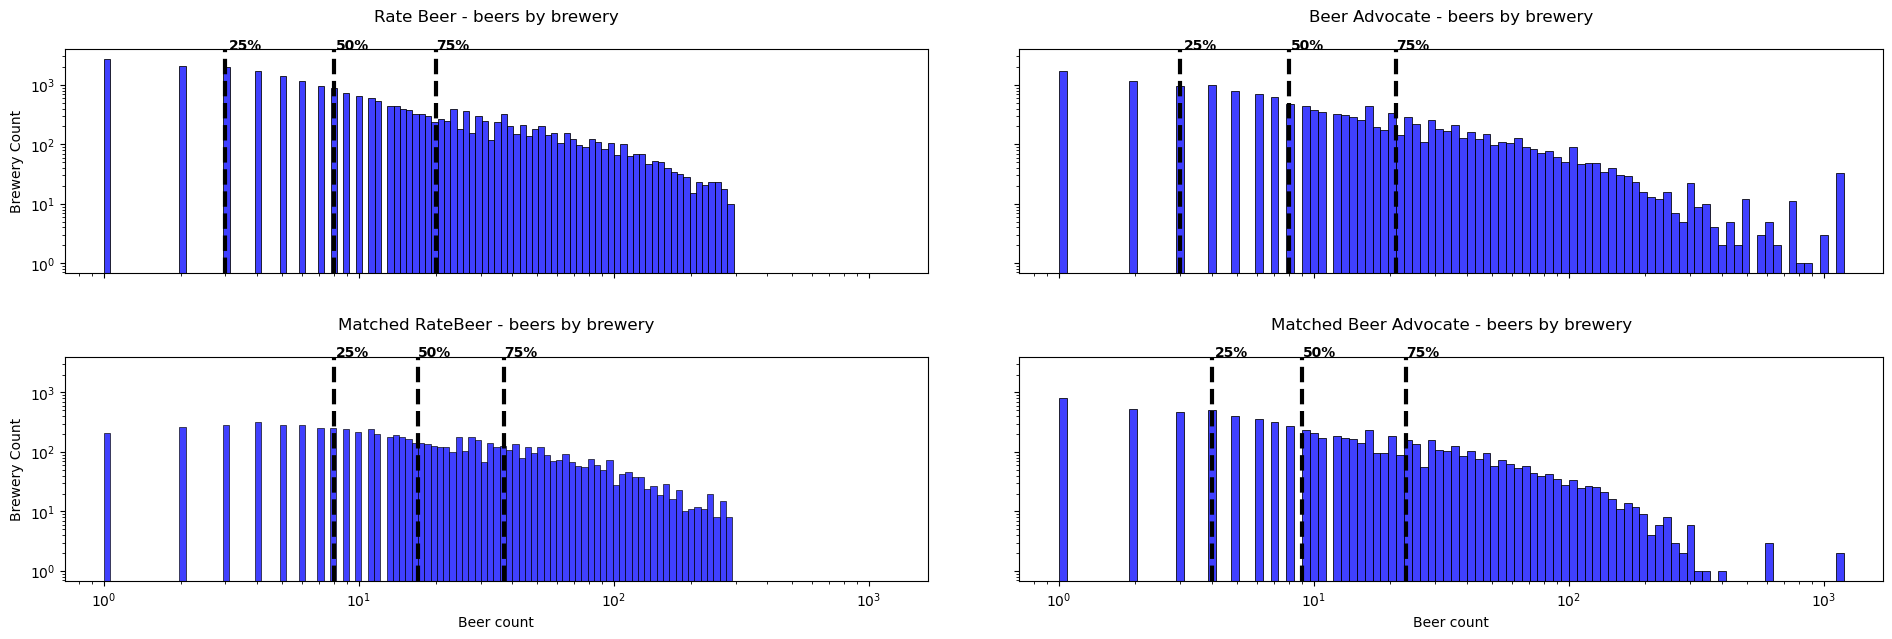

In [34]:
#Histograms
#Breweries binned by beer count

titles = ['Beer Advocate - beers by brewery','Rate Beer - beers by brewery', 'Matched RateBeer - beers by brewery','Matched Beer Advocate - beers by brewery']
plot_data = [df_rb_breweries_wbeer.nbr_beers, df_adv_breweries_wbeer.nbr_beers, df_md_breweries_wbeer.rb_nbr_beers,df_md_breweries_wbeer.ba_nbr_beers]

fig, axes = plt.subplots(2, 2, figsize=(20, 7),sharey=True,sharex=True)
fig.tight_layout(pad=5)
for i,datum in enumerate(plot_data):
    sns.histplot(ax=axes.flat[i],data=datum,bins=100,log_scale=(True,True), kde=False, color="blue")
    axes.flat[i].set_xlabel("Brewery count")
    axes.flat[i].set_ylabel("Beer Count")
    axes.flat[i].set_title(titles[i], pad=20)
    for q in quantiles:
        axes.flat[i].axvline(plot_data[i].quantile(q), 0, 1, color="black", ls='--',linewidth=3)
        axes.flat[i].text(plot_data[i].quantile(q)+0.1, 4e3, str(int(q*100))+'%', horizontalalignment='left', size='medium', color='black', weight='semibold')

    

We observe a skewed distribution of the number of breweries according to their beer count. In addition, we notice that the RateBeer dataset has no breweries with more than 200 beers. It is possible that some data was lost.

In [35]:
#Some stats
print(df_adv_breweries_wbeer.shape)
df_adv_breweries_wbeer[["nbr_beers"]].describe()

(14522, 4)


,nbr_beers
count,14522.000000
mean,24.298444
std,74.041044
min,1.000000
25%,3.000000
50%,8.000000
75%,21.000000
max,1196.000000


In [36]:
print(df_rb_breweries_wbeer.shape)
df_rb_breweries_wbeer[["nbr_beers"]].describe()

(24118, 4)


,nbr_beers
count,24118.000000
mean,19.078655
std,31.572100
min,1.000000
25%,3.000000
50%,8.000000
75%,20.000000
max,295.000000


In [37]:
print(df_md_breweries_wbeer.shape)
df_md_breweries_wbeer[["ba_nbr_beers","rb_nbr_beers"]].describe()

(7600, 10)


,ba_nbr_beers,rb_nbr_beers
count,7600.000000,7600.000000
mean,20.411974,30.334474
std,38.073777,38.668669
min,1.000000,1.000000
25%,4.000000,8.000000
50%,9.000000,17.000000
75%,23.000000,37.000000
max,1196.000000,291.000000


In [38]:
#Number of different locations the breweries come from: 
print("The breweries of Beer Advocate come from {} different locations".format(df_adv_breweries_wbeer["location"].nunique()))
print("The breweries of RateBeer come from {} different locations".format(df_rb_breweries_wbeer["location"].nunique()))
print("The Beer Advocate breweries of the Matched Beer dataset come from {} different locations".format(df_md_breweries_wbeer["ba_location"].nunique()))
print("The RateBeer breweries of the Matched Beer dataset come from {} different locations".format(df_md_breweries_wbeer["rb_location"].nunique()))

The breweries of Beer Advocate come from 277 different locations
The breweries of RateBeer come from 267 different locations
The Beer Advocate breweries of the Matched Beer dataset come from 202 different locations
The RateBeer breweries of the Matched Beer dataset come from 202 different locations


In [39]:
#Top 5 locations of the breweries for each dataset:
breweries_top5_locations=pd.DataFrame(columns=['Beer Advocate breweries','Rate Beer breweries','Matched Beer Advocate breweries','Matched Rate Beer breweries'])
breweries_top5_locations['Beer Advocate breweries']=df_adv_breweries_wbeer["location"].value_counts().index.tolist()[:5] #we sort the number of occurences of each location and extract the corresponding top 5 locations
breweries_top5_locations['Rate Beer breweries']=df_rb_breweries_wbeer["location"].value_counts().index.tolist()[:5]
breweries_top5_locations['Matched Beer Advocate breweries']=df_md_breweries_wbeer["ba_location"].value_counts().index.tolist()[:5]
breweries_top5_locations['Matched Rate Beer breweries']=df_md_breweries_wbeer["rb_location"].value_counts().index.tolist()[:5]


breweries_top5_locations

,Beer Advocate breweries,Rate Beer breweries,Matched Beer Advocate breweries,Matched Rate Beer breweries
0,Germany,England,"United States, California","United States, California"
1,England,Germany,England,England
2,"United States, California",Italy,Germany,Germany
3,Canada,Canada,Canada,Canada
4,"United States, New York","United States, California","United States, Colorado","United States, Colorado"


<a id='textual_reviews'></a>
## Textual reviews and rating analysis

### Textual reviews

In [40]:
#Here we use a utilitary function to directly compute everything:
from functions import NLP_utils



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/joaoprado/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [41]:
RB_langs,RB_counts, RB_dates = NLP_utils.summary_analysis("RateBeer")

Started identifying languages, counting words and binning dates...
Done


In [42]:
BA_langs,BA_counts, BA_dates = NLP_utils.summary_analysis("BeerAdvocate")

Started identifying languages, counting words and binning dates...
Done


<AxesSubplot:xlabel='date', ylabel='Count'>

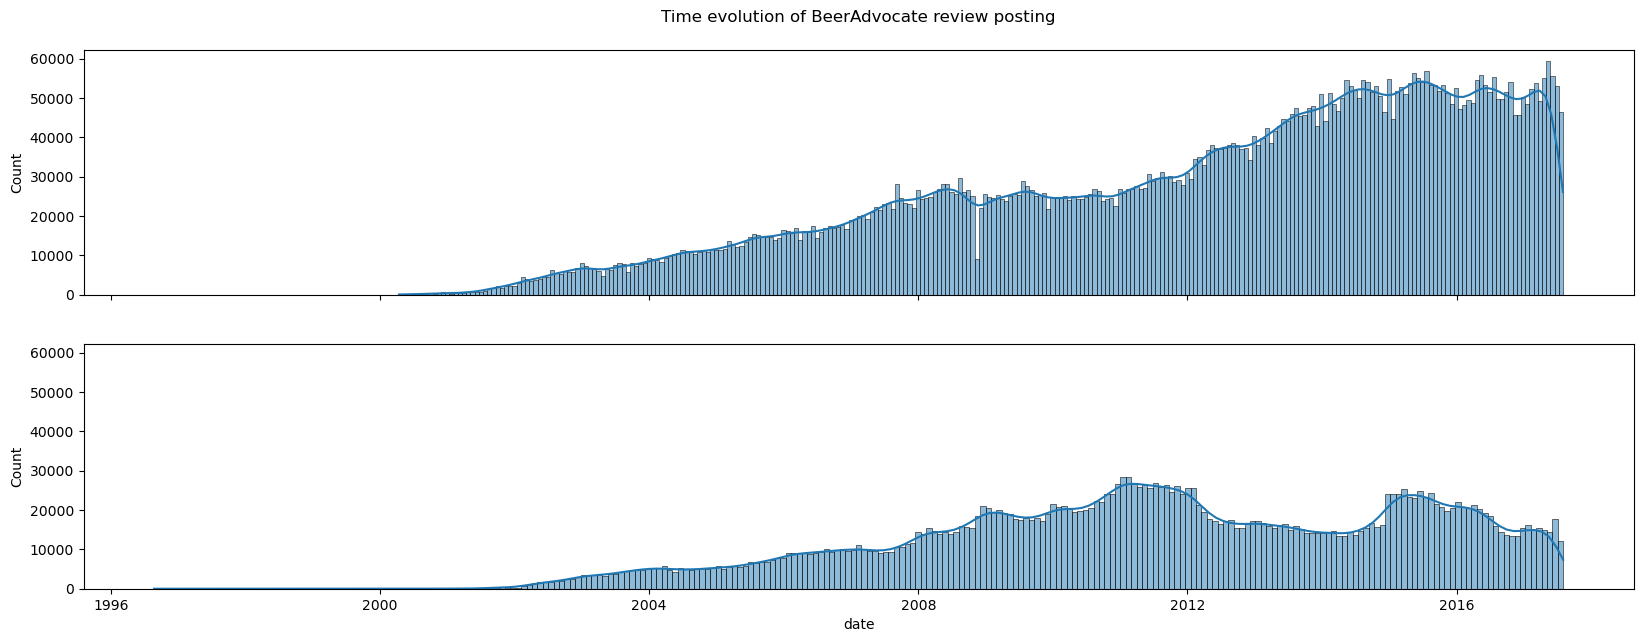

In [43]:
# How does the review rate of users changes with time for each site:

fig, axes = plt.subplots(2, 1, figsize=(20, 7),sharey=True,sharex=True)
RB_dates = pd.to_datetime(RB_dates,unit='s')
BA_dates = pd.to_datetime(BA_dates,unit='s')
axes[1].set_title("Time evolution of RateBeer review posting", pad=20)
sns.histplot(RB_dates,log_scale=(False,False),kde=True,ax=axes[0])
axes[0].set_title("Time evolution of BeerAdvocate review posting", pad=20)
sns.histplot(BA_dates,log_scale=(False,False),kde=True,ax=axes[1])

<AxesSubplot:title={'center':'Beer Advocate - Review word count'}, xlabel='Word per review', ylabel='Review count'>

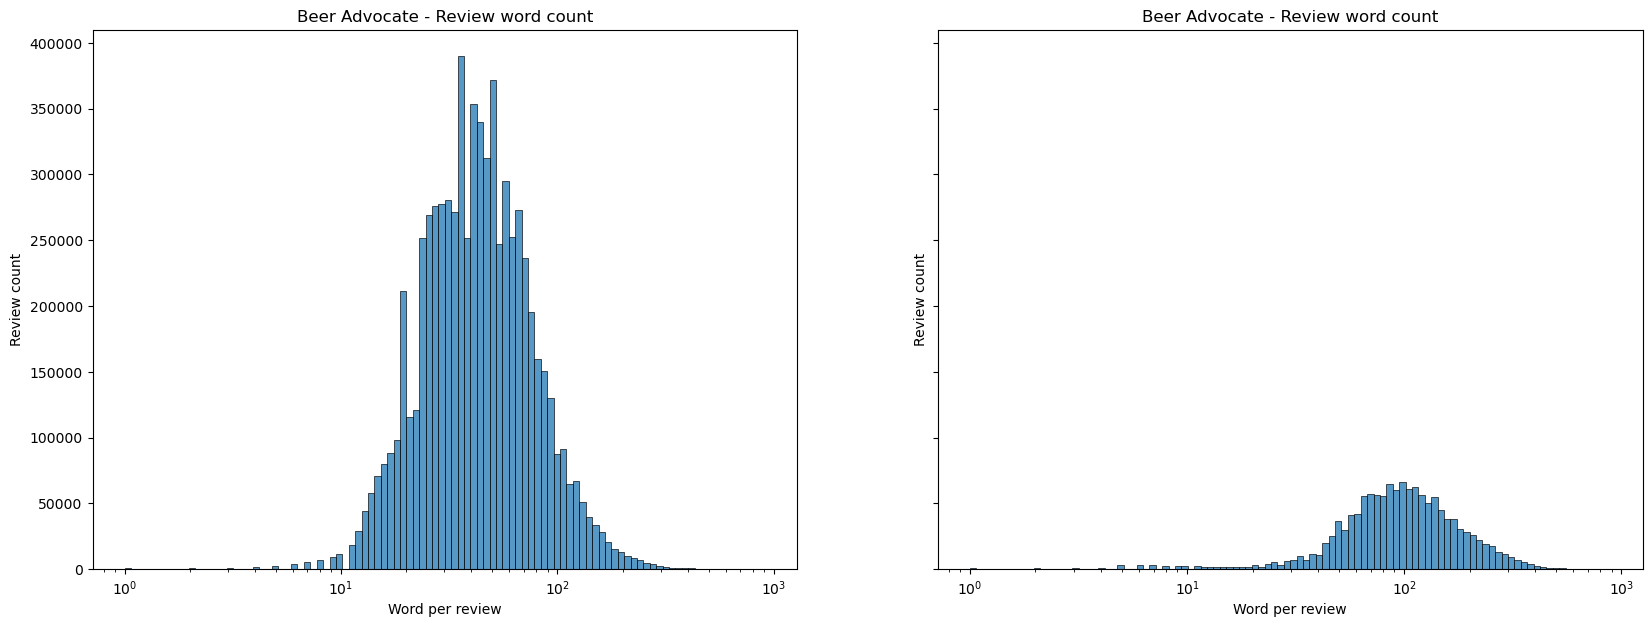

In [44]:
#Word count distributions for each site: 
fig, axes = plt.subplots(1, 2, figsize=(20, 7),sharey=True,sharex=False)

axes[0].set_title('Beer Advocate - Review word count')
axes[0].set_xlabel('Word per review')
axes[0].set_ylabel('Review count')
sns.histplot(RB_counts,bins=100, log_scale=(True,False),ax=axes[0])

axes[1].set_title('Beer Advocate - Review word count')
axes[1].set_xlabel('Word per review')
axes[1].set_ylabel('Review count')
sns.histplot(BA_counts,bins=100, log_scale=(True,False),ax=axes[1])

### Rating analysis

In [45]:
#We start by fetching the ratings
rb_ratings = NLP_utils.fetch_ratings("RateBeer")
ba_ratings = NLP_utils.fetch_ratings("BeerAdvocate")


<AxesSubplot:title={'center':'Beer Advocate - Review word count'}, xlabel='Word per review', ylabel='Review count'>

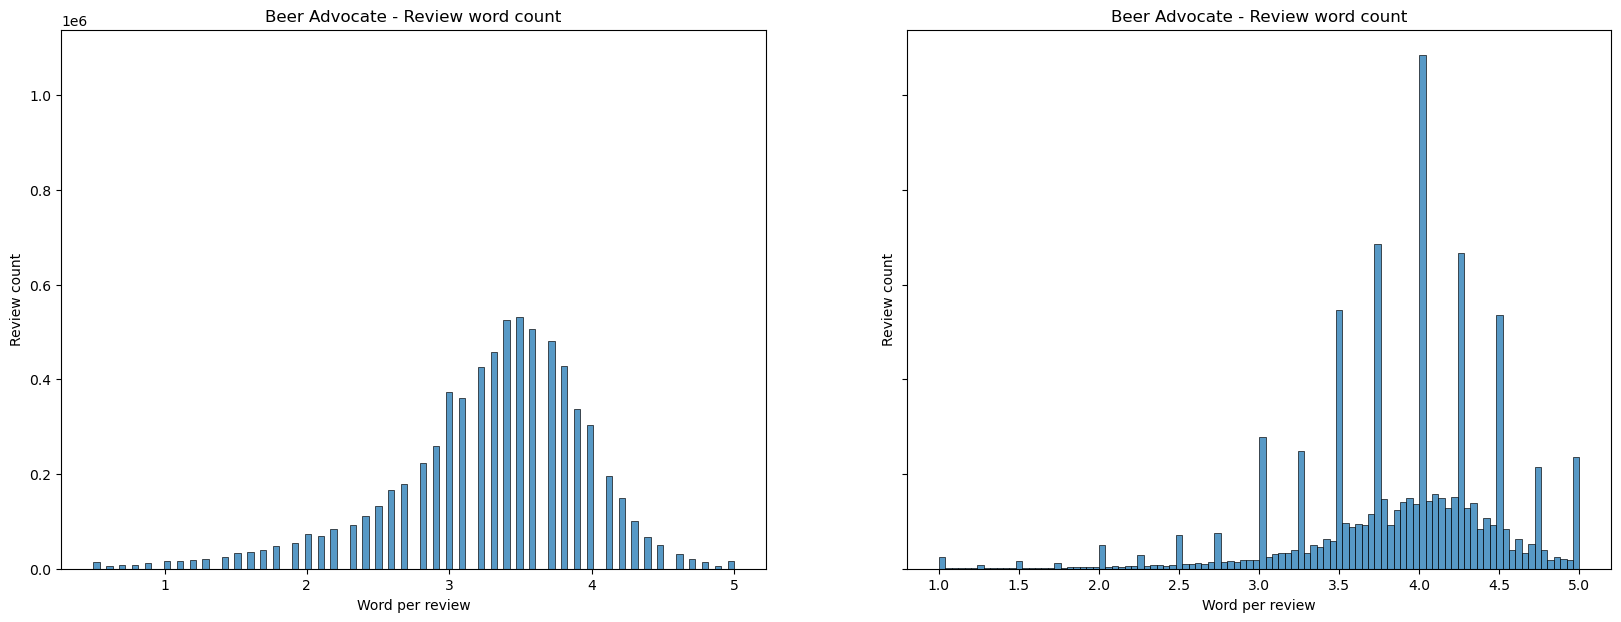

In [46]:
import matplotlib.pyplot as plt

import seaborn as sns
#Ratings distribution for each site
fig, axes = plt.subplots(1, 2, figsize=(20, 7),sharey=True,sharex=False)

axes[0].set_title('Beer Advocate - Review word count')
axes[0].set_xlabel('Word per review')
axes[0].set_ylabel('Review count')
sns.histplot(rb_ratings,bins=100, log_scale=(False,False),ax=axes[0])

axes[1].set_title('Beer Advocate - Review word count')
axes[1].set_xlabel('Word per review')
axes[1].set_ylabel('Review count')
sns.histplot(ba_ratings,bins=100, log_scale=(False,False),ax=axes[1])

<a id='sat'></a>
## SAT Dataset

In [ ]:
#We fetch the data from the Sat website with an auxiliary function
from functions import read_data

SAT_beers = read_data.fetch_satellite_df()
BA_beers = df_adv_beer_wrating
RB_beers = df_rb_beer_wrating

#We clean up the dataset:
# Keep only the maximum price, corresponding to the maximum volume in the 'vol' column of the dataframe
SAT_beers["prix"] = SAT_beers['prix'].str.findall('[0-9]*\.?[0-9]*').apply(lambda x : max([float(price) for price in x if len(price)!=0]))


SAT_beers.head(15)

In [47]:
#Here are all the results of our vector space retrieval approach done in another notebook:
SAT_matched = pd.read_csv("DATA/matched_SATbeers.csv")
#this dataset contains the best matches of Sat beers with our datasets. We show the beer names, their ratings
#and their cosine similarity with the Sat beers.
display(SAT_matched)

,Unnamed: 0,SAT name,Alcohol content,Beer Advocate name,Beer Advocate average rating,Similarity with BeerAdvocate,RateBeer name,RateBeer average rating,Similarity with RateBeer
0,0,Brooklyn East IPA,6.9,Brooklyn East India Pale Ale,3.65,0.901222,Brooklyn East IPA / India Pale Ale,3.40,0.926097
1,1,Cuvée des Trolls,7.0,Cuvée Des Trolls,3.53,0.809686,Dubuisson Cuvée des Trolls,3.06,0.900214
2,2,Elvis Juice,6.5,Elvis Juice,3.97,1.000000,Three Magnets Juice Juice Juice Storm Triple IPA,3.17,0.319643
3,3,Grimbergen Blonde,6.7,Grimbergen Blonde,3.69,0.727285,Grimbergen Blonde,3.19,0.619384
4,4,Gurten Lager,4.8,Gurten BäreGold,3.07,0.513870,Gurten Lager Hell,2.52,0.728060
...,...,...,...,...,...,...,...,...,...
61,61,Robustus 6,5.0,Robustus 6,3.77,0.856007,Riegele BierManufaktur Robustus 6,3.39,0.882417
62,62,Noctus 100,10.0,Noctus 100,3.93,0.896827,Riegele BierManufaktur Noctus 100,3.57,0.895519
63,63,Katerfrühstück,10.0,Schoppe Black Flag,3.79,0.553223,Schoppe Katerfrühstück,3.52,0.689878
64,64,Big Mountain Pale Ale,4.6,Oktoberfest,4.00,0.515817,Big Bear Mountain Pub Pale Ale,2.65,0.700622


In [48]:
#Some have low cosine similarity, lets check them

unmatched_beers = SAT_matched[(SAT_matched["Similarity with BeerAdvocate"]< 0.7) & (SAT_matched["Similarity with RateBeer"] < 0.7)]
display(unmatched_beers)


,Unnamed: 0,SAT name,Alcohol content,Beer Advocate name,Beer Advocate average rating,Similarity with BeerAdvocate,RateBeer name,RateBeer average rating,Similarity with RateBeer
5,5,Charles Quint Rubis,8.5,Charles Quint Blonde / Keizer Karel Blond,3.76,0.605424,Charles Quint Rouge Rubis / Keizer Karel Robij...,3.36,0.630693
6,6,Lupulus Blonde,8.5,Lupulus,3.80,0.587973,Keltius / La Quince Humulus Lupulus Kince Lupulus,3.50,0.531351
10,10,Wittekop,5.0,Wheat Beer,3.37,0.470640,Wittekop (2007 - ),2.85,0.629302
12,12,Surette,6.8,Peach Surette,3.00,0.472944,Crooked Stave Autumn Surette,3.70,0.355629
13,13,Hopbliminal Messages,5.5,Medium & Message,3.53,0.429212,Amundsen I Love Rye,3.02,0.513551
24,24,Chimay bleue,9.0,Chimay Grande Réserve (Blue),4.28,0.544871,Chimay Bleue (Blue) / Grande Réserve,4.00,0.610482
26,26,Chimay rouge,7.0,Chimay Première (Red),4.10,0.606156,Chimay (Red / Rouge / Ale / Première),3.77,0.564462
39,39,Lupulus Hopera,6.0,Lupulus Hopera,3.86,0.672541,Keltius / La Quince Humulus Lupulus Kince Lupulus,3.50,0.506738
53,53,Sourtime blackcurrant,4.5,Maryensztadt Sweet Sixteen,3.91,0.552199,Maryensztadt Sourtime Czarna Porzeczka,3.24,0.679986
59,59,Uto-Pig,4.6,Pale Ale,3.74,0.579797,the Black Pig la Novice - Sun of a Beach,3.04,0.472086
